In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import os

In [2]:
df_l3 = pd.read_excel("data/Level_3.xlsx")

In [3]:
df_l3.head()

,small_area,co-benefit_type,damage_pathway,damage_type,2025,2026,2027,2028,2029,2030,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,sum
0,E01000001,air_quality,reduced_mortality,health,0.003336,0.003663,6.917033e-03,8.674610e-03,1.085301e-02,1.408742e-02,...,6.968484e-02,7.270200e-02,7.526418e-02,7.737418e-02,7.860485e-02,7.868850e-02,7.817872e-02,7.763434e-02,7.710436e-02,1.201945
1,E01000001,air_quality,society,non-health,0.000039,0.000043,8.140000e-05,1.020450e-04,1.276710e-04,1.657200e-04,...,8.197480e-04,8.552410e-04,8.853820e-04,9.102030e-04,9.246800e-04,9.256640e-04,9.196670e-04,9.132640e-04,9.070290e-04,0.014139
2,E01000001,congestion,time_saved,non-health,0.005570,0.009543,1.191381e-02,1.324733e-02,1.365541e-02,1.479793e-02,...,-2.996094e-02,-3.209987e-02,-3.437791e-02,-3.693888e-02,-4.099173e-02,-4.281875e-02,-4.471182e-02,-4.611941e-02,-4.897514e-02,-0.369011
3,E01000001,dampness,NHS,non-health,0.000000,0.000000,1.260000e-05,1.240000e-05,1.240000e-05,2.410000e-06,...,2.970000e-05,3.320000e-05,3.290000e-05,3.200000e-05,3.180000e-05,3.150000e-05,3.150000e-05,3.130000e-05,3.110000e-05,0.000504
4,E01000001,dampness,QALY,health,0.000000,0.000000,3.070000e-07,3.050000e-07,3.030000e-07,5.910000e-08,...,7.260000e-07,8.120000e-07,8.060000e-07,7.830000e-07,7.780000e-07,7.720000e-07,7.710000e-07,7.650000e-07,7.610000e-07,0.000012


In [ ]:
df_lkup = pd.read_excel("data/lookups.xlsx").drop('Unnamed: 4', axis=1)

In [5]:
df_lkup.head()

,small_area,population,households,local_authority,nation
0,E01000001,1721,838,City of London,Eng/Wales
1,E01000002,1608,824,City of London,Eng/Wales
2,E01000003,1826,1017,City of London,Eng/Wales
3,E01000005,1605,480,City of London,Eng/Wales
4,E01000006,1833,554,Barking and Dagenham,Eng/Wales


In [8]:
df_l3Car_lookup = df_l3.merge(
    df_lkup[df_lkup['local_authority'] == "Cardiff"],
    on='small_area',
    how='inner'
)

In [3]:
os.getcwd()

'/Users/aurafrizzati/Desktop/VizElfs'

In [11]:
wimd = pd.read_excel(
    "data/wimd-2025-index-and-domain-ranks-by-small-area.ods",
    sheet_name = "Deciles_quintiles_quartiles",
    skiprows=3,
    engine="odf"
)

In [13]:
#df_l3Car_lookup.shape
df_l3Car_lookup_wimd= pd.merge(df_l3Car_lookup, wimd, how='left', left_on=['small_area'], right_on=['LSOA code'])
df_l3Car_lookup_wimd.head()
df_l3Car_lookup_wimd.to_csv("data/lsoa_cardiff_wimd.csv")

In [18]:
import pandas as pd 
df_l3Car_lookup_wimd = pd.read_csv("data/lsoa_cardiff_wimd.csv")

In [20]:
df_l3Car_lookup_wimd

,co-benefit_type,damage_pathway,damage_type,2025,2026,2027,2028,2029,2030,2031,...,2049,2050,sum,population,households,LSOA code,LSOA name (Eng),WIMD 2025 overall rank,WIMD 2025 overall decile,WIMD 2025 overall quintile
0,air_quality,reduced_mortality,health,0.003359,5.408322e-03,6.949793e-03,0.008954,0.011502,0.015201,1.941414e-02,...,0.093800,0.093225,1.432637,2064,885,W01001694,Adamsdown 1,189,1,1
1,air_quality,society,non-health,0.000039,6.360000e-05,8.180000e-05,0.000105,0.000135,0.000179,2.283810e-04,...,0.001103,0.001097,0.016853,2064,885,W01001694,Adamsdown 1,189,1,1
2,congestion,time_saved,non-health,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,2064,885,W01001694,Adamsdown 1,189,1,1
3,dampness,NHS,non-health,0.000000,7.190000e-08,1.270000e-07,0.000173,0.000173,0.000055,8.900000e-06,...,0.000278,0.000276,0.004798,2064,885,W01001694,Adamsdown 1,189,1,1
4,dampness,QALY,health,0.000000,1.760000e-09,3.100000e-09,0.000004,0.000004,0.000001,2.180000e-07,...,0.000007,0.000007,0.000117,2064,885,W01001694,Adamsdown 1,189,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,noise,sleep_disturbance,health,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,1122,627,W01002025,Grangetown 14,1186,7,4
4356,physical_activity,reduced_mortality,health,0.007626,1.089120e-02,1.336850e-02,0.015414,0.017284,0.019102,1.990577e-02,...,0.029751,0.030044,0.598695,1122,627,W01002025,Grangetown 14,1186,7,4
4357,road_repairs,society,non-health,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,1122,627,W01002025,Grangetown 14,1186,7,4
4358,road_safety,reduced_mortality,health,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,1122,627,W01002025,Grangetown 14,1186,7,4


In [5]:
import geopandas as gpd
shapefile_path = "data/shapefile/small_areas_british_grid.shp"

# lsoa_gdf = gpd.read_file(shapefile_path, engine='fiona')
# or
lsoa_gdf = gpd.read_file(shapefile_path, engine='pyogrio')

In [8]:
df_l3Car_lookup_wimd.head()

,Unnamed: 0,small_area,co-benefit_type,damage_pathway,damage_type,2025,2026,2027,2028,2029,...,local_authority,nation,LSOA code,LSOA name (Eng),Local Authority name (Eng),WIMD 2025 overall rank,WIMD 2025 overall decile,WIMD 2025 overall quintile,WIMD 2025 overall quartile,WIMD 2025 overall deprivation group
0,0,W01001694,air_quality,reduced_mortality,health,0.003359,5.408322e-03,6.949793e-03,0.008954,0.011502,...,Cardiff,Eng/Wales,W01001694,Adamsdown 1,Cardiff,189,1,1,1,1
1,1,W01001694,air_quality,society,non-health,0.000039,6.360000e-05,8.180000e-05,0.000105,0.000135,...,Cardiff,Eng/Wales,W01001694,Adamsdown 1,Cardiff,189,1,1,1,1
2,2,W01001694,congestion,time_saved,non-health,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,Cardiff,Eng/Wales,W01001694,Adamsdown 1,Cardiff,189,1,1,1,1
3,3,W01001694,dampness,NHS,non-health,0.000000,7.190000e-08,1.270000e-07,0.000173,0.000173,...,Cardiff,Eng/Wales,W01001694,Adamsdown 1,Cardiff,189,1,1,1,1
4,4,W01001694,dampness,QALY,health,0.000000,1.760000e-09,3.100000e-09,0.000004,0.000004,...,Cardiff,Eng/Wales,W01001694,Adamsdown 1,Cardiff,189,1,1,1,1


In [21]:
lsoa_gdf.head()

,small_area,geometry
0,N20000001,"POLYGON ((133996.914 553603.376, 133988.252 55..."
1,N20000002,"POLYGON ((137865.858 549642.6, 137859.499 5496..."
2,N20000003,"POLYGON ((119675.619 552886.698, 119676.791 55..."
3,N20000004,"POLYGON ((125776.464 552336.061, 125785.354 55..."
4,N20000005,"POLYGON ((137865.858 549642.6, 137874.822 5496..."


In [9]:
lsoa_gdfCar = lsoa_gdf[
    lsoa_gdf['small_area'].isin(df_l3Car_lookup_wimd['small_area'])
]

In [ ]:
# converts the coordinate reference system (CRS) of your GeoDataFrame to EPSG:4326, which is the 
# WGS84 geographic coordinate system (latitude/longitude).
lsoa_gdfCar = lsoa_gdfCar.to_crs(epsg=4326)

In [24]:
lsoa_gdfCar.head()

,small_area,geometry
39123,W01001694,"POLYGON ((-3.15484 51.48793, -3.15371 51.48625..."
39124,W01001695,"POLYGON ((-3.16614 51.47856, -3.17142 51.47729..."
39125,W01001696,"POLYGON ((-3.16042 51.48508, -3.16062 51.48437..."
39126,W01001697,"POLYGON ((-3.14268 51.49406, -3.14828 51.48951..."
39127,W01001698,"POLYGON ((-3.15453 51.49146, -3.15215 51.49114..."


In [ ]:
# aggrgeate by lsoa to remove duplicated rows
df_wimd_2025_grouped = (
    df_l3Car_lookup_wimd
    .groupby(['LSOA name (Eng)','LSOA code'], as_index=False)['WIMD 2025 overall quintile']
    .first()
)

In [25]:
df_wimd_2025_grouped = df_wimd_2025_grouped.rename(
    columns={'LSOA code': 'small_area'}
)

lsoa_cardiff_wimd = lsoa_gdfCar.merge(
    df_wimd_2025_grouped[['small_area', 'WIMD 2025 overall quintile']],
    on='small_area',
    how='left'
)

/var/folders/pm/9f068dg15csbjk3w6rp3gplm0000gn/T/ipykernel_2810/2160351827.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("RdYlBu_r", 5)


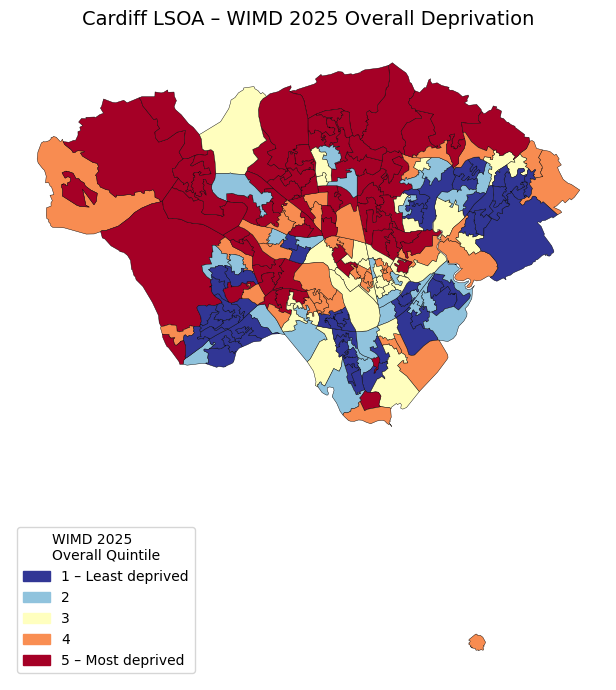

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(7, 7))

# Plot the map WITHOUT the automatic legend
lsoa_cardiff_wimd.plot(
    column='WIMD 2025 overall quintile',
    cmap='RdYlBu_r',
    linewidth=0.3,
    edgecolor='black',
    legend=False,
    categorical=True,
    ax=ax,
    missing_kwds={
        "color": "lightgrey",
        "label": "No data"
    }
)

# ---- BUILD A CLEAR, ORDERED LEGEND (Least → Most) ----
legend_labels = {
    1: "1 – Least deprived",
    2: "2",
    3: "3",
    4: "4",
    5: "5 – Most deprived"
}

cmap = plt.cm.get_cmap("RdYlBu_r", 5)

legend_patches = [
    mpatches.Patch(color=cmap(i-1), label=legend_labels[i])
    for i in [1, 2, 3, 4, 5]
]

# ---- PLACE LEGEND IN BOTTOM-LEFT ----
ax.legend(
    handles=legend_patches,
    title="WIMD 2025\nOverall Quintile",
    loc="lower left",        # ✅ bottom-left
    frameon=True
)

# ---- TITLES & CLEANUP ----
ax.set_title("Cardiff LSOA – WIMD 2025 Overall Deprivation", fontsize=14)
ax.set_axis_off()

plt.tight_layout()
plt.show()